# Funciones escalares, gráficas, conjuntos de nivel y funciones vectoriales.

In [1]:
import time
print(' Última ejecución ', time.asctime() )

 Última ejecución  Thu Jan 25 13:35:04 2024


### Objectivos

Presentar los conceptos de

* funciones escalares y la gráfica de una función escalar
    
* los conjuntos de nivel

* funciones vectoriales

y asociarlos a funciones conocidas en Física Clásica: 

* el potencial y el campo eléctrico

o de otros ámbitos:

* los mapas de superficie topográficos o los mapas de isobaras.


In [2]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

### Funciones escalares

Observa la siguiente figura:

* ¿Has visto en Física alguna función similar a la que estamos dibujando? 

* ¿Reconoces a qué se parece?


In [3]:
def charge_potential():
    rs   = np.linspace(0.1,     10, 60)
    phis = np.linspace(0., 2*np.pi, 60)
    rms, pms = np.meshgrid(rs, phis)
    # compute the electromagnetic potential
    k = 1.; q = 1. # GeV2
    vms =  k*q / rms # potencial  
    vms[vms > 1] = 1. # truncate the figure
    xms = rms * np.cos(pms)
    yms = rms * np.sin(pms)
    fig = plt.figure(); ax = plt.axes(projection='3d')
    sf = ax.plot_surface(xms, yms, vms, cmap='jet');
    plt.xlabel('$x$'); plt.ylabel('$y$'); ax.set_zlabel('$V(x, y)$')
    plt.title('$V(x, y) = 1/ \sqrt{x^2 + y^2}$')
    fig.colorbar(sf); plt.tight_layout();
    return xms, yms, vms

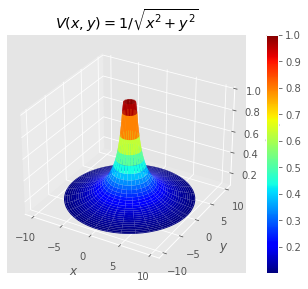

In [4]:
xms, yms, vms = charge_potential()


Es el potencial electromagnético de una carga en el plano

$$
V(x, y) = k \frac{q}{\sqrt{x^2 + y^2}}
$$

Solo que hemos tomado por simplicidad $k = 1$ y $q=1$. 

También hemos truncando la gráfica para poder verla mejor.

La anterior función es una **función escalar**. 

Una función escalar, $f({\bf x})$, asigna un valor real, a un punto, ${\bf x}$, de un dominio, $\mathcal{D}$, en un espacio real de dimensión $n$, $\mathrm{R}^n$, con $n>1$. 

$$
{\bf x} \in \mathcal{D} \subset \mathrm{R}^n \mapsto f({\bf x}) \in \mathrm{R}
$$

El potencial eléctrico anterior es una función escalar de $\mathrm{R}^2$, donde el dominio es todo $\mathrm{R}^2$ menos el origen, $(0, 0)$, donde la función no está definida.


#### Gráfica de una función 

La figura anterior es la **gráfica** del potencial eléctrico de una carga. 

Sea $f(x, y)$ una función escalar con dominio $\mathcal{D}$ de $\mathrm{R}^2$, la gráfica de la función son los puntos de $\mathrm{R}^3$ dados por:

$$
\{(x, \, y, \, f(x, y)), \; \forall \;(x, \, y) \, \in \, \mathcal{D}\}
$$


En el caso anterior, la gráfica de la función $f(x, y)$ son los puntos $(x, y, z = f(x, y))$.

¡Los humanos somos algo limitados solo podemos 'ver' las gráficas de las funciones escalares de dos dimensiones!


#### Conjuntos de nivel

Si te fijas, el valor del potencial eléctrico es el mismo para todos los puntos de una circunferencia centrada en el origen. Decimos que son puntos equipotenciales.

De otra forma, si calculamos cuáles son los puntos cuya función vale un determinado valor $c$, esto es $f(x, y) = c$, obtenemos la ecuación de una circunferencia:

$$
f(x, y) = c \;\; \Rightarrow \frac{1}{\sqrt{x^2 + y^2}} = c\;\;  \Rightarrow x^2 + y^2 = (1/c)^2
$$


El conjunto de nivel son todos los puntos, ${\bf x} = {x_1, \dots }$ del dominio inicial, $\mathcal{D}$, en un espacio real de dimension $n$, $\mathrm{R}^n$, con $n>1$, cuyo valor de la función es un mismo valor, $c$.
Esto es:

$$
\{  \forall \, {\bf x} \, \in \mathcal{D} \subset \mathrm{R}^n \; | \; f({\bf x}) = c \}
$$






De hecho, podemos dibujar una función a partir de sus conjuntos de nivel. 

Observa la siguiente figura. Hemos dibujado la misma función, el potencial eléctrico, pero usando diversos conjuntos de nivel. ¿Puedes imaginar su gráfica en tres dimensiones a partir de los conjuntos de nivel?

Los conjuntos de nivel tienen una ventaja adicional, si nos movemos dentro de uno de ellos ¡la función no cambia de valor!

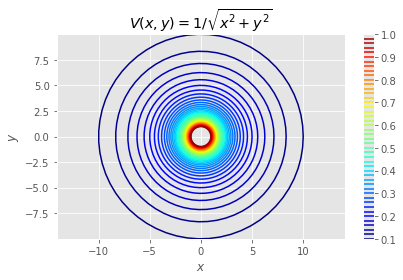

In [5]:
fig = plt.figure()
ax = fig.gca()
sf = ax.contour(xms, yms, vms, 50, cmap='jet');
plt.xlabel('$x$'); plt.ylabel('$y$');  
plt.title('$V(x, y) = 1/ \sqrt{x^2 + y^2}$')
fig.colorbar(sf); plt.axis('equal'); plt.tight_layout();

*Cuestión*: En el caso del potencial eléctrico en tres dimensiones de una carga situada en el origen, ¿qué figura geométrica forman sus conjuntos de nivel?


*Ejercicio*: Indica cuál es su dominio y dibuja la gráfica de la función escalar: 

$f(x, y) = x^2 + y^2$

¿Qué forma geométrica forman sus conjuntos de nivel?    


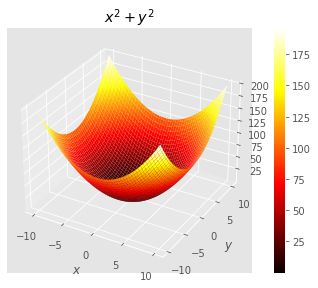

In [6]:
xs       = np.linspace(-10., 10., 100)
ys       = np.linspace(-10., 10., 100)
xms, yms = np.meshgrid(xs, ys) 
zms = xms*xms + yms*yms
fig = plt.figure(); ax = plt.axes(projection='3d')
sf = ax.plot_surface(xms, yms, zms, cmap = 'hot'); fig.colorbar(sf);
plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('$x^2 + y^2$'); 
plt.tight_layout();

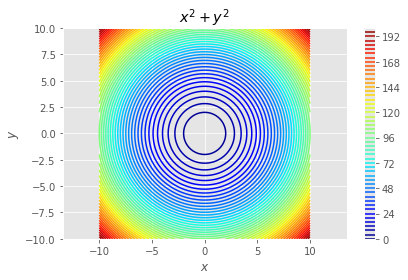

In [7]:
fig = plt.figure()
sf = plt.contour(xms, yms, zms, 50, cmap = 'jet')  ; fig.colorbar(sf); 
plt.axis('equal')
plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('$x^2 + y^2$'); 
plt.tight_layout();

*Solución*: el dominio es todo $\mathrm{R}^2$. 

Los conjuntos de nivel son circunferencias ($c > 0$):

$$
x^{2} + y^{2} = c
$$

Para $c = 0$, el conjunto de nivel es el origen $(0, 0)$.

*Ejercicio*: Considera ahora la función escalar $f(x, y) = \frac{x^2}{a^2} + \frac{y^2}{b^2}$, donde $a, \, b$ son constantes. Estudia su dominio, dibuja sus gráfica y sus conjuntos de nivel. ¿qué figura geométrica son? Usa valores concretos para $a, \, b$, por ejemplo $a =1, \, b = 2$.

a  1.0 , b = 2.0


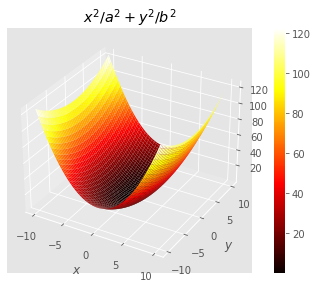

In [8]:
xs       = np.linspace(-10., 10., 100)
ys       = np.linspace(-10., 10., 100)
xms, yms = np.meshgrid(xs, ys) 
a, b     = 1., 2.
print('a ', a, ', b =', b)
zms = +xms*xms/(a*a) + yms*yms/(b*b)
fig = plt.figure(); ax = plt.axes(projection='3d')
sf = ax.plot_surface(xms, yms, zms, cmap = 'hot'); fig.colorbar(sf);
plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('$x^2/a^2 + y^2/b^2$'); 
plt.tight_layout();

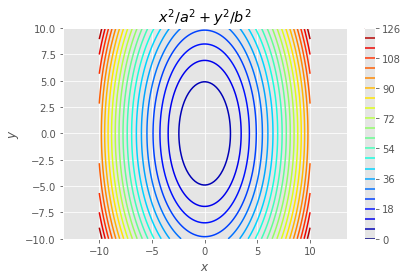

In [9]:
fig = plt.figure();
sf  = plt.contour(xms, yms, zms, 20, cmap = 'jet'); fig.colorbar(sf);
plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('$x^2/a^2 + y^2/b^2$'); 
plt.axis('equal'); plt.tight_layout();

*Solución*: los conjuntos de nivel son elipses ($c >0)$:

$$
\frac{x^2}{c \, a^2} + \frac{y^2}{c \, b^2} = 1
$$

cuando $a = b$, son circunferencias, y cuando $c = 0$? el conjunto de nivel es el origen $(0, 0)$.

*Ejercicio*: Considera ahora la función escalar $f(x, y) = x^2 - y^2$. Estudia su dominio, dibuja sus gráfica y sus conjuntos de nivel. ¿Qué figura geométrica son?

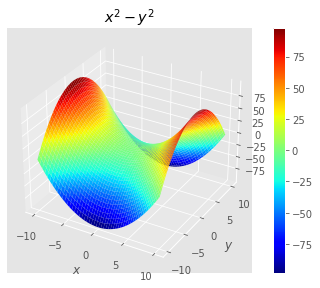

In [10]:
xs       = np.linspace(-10., 10., 100)
ys       = np.linspace(-10., 10., 100)
xms, yms = np.meshgrid(xs, ys) 
zms = xms*xms - yms*yms
fig = plt.figure(); ax = plt.axes(projection='3d')
sf = ax.plot_surface(xms, yms, zms, cmap = 'jet'); fig.colorbar(sf);
plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('$x^2 - y^2$'); 
plt.tight_layout();

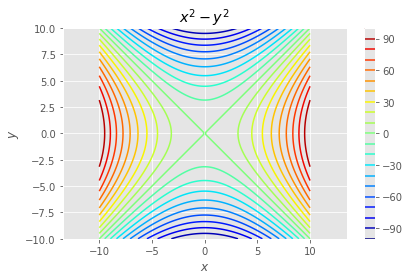

In [11]:
fig = plt.figure();
sf  = plt.contour(xms, yms, zms, 20, cmap = 'jet'); fig.colorbar(sf);
plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('$x^2 - y^2$'); 
plt.axis('equal'); plt.tight_layout();

*Solución*: los conjuntos de nivel son hipérbolas:

$$
x^2 - y^2 = c
$$

Para el caso $c = 0$, el conjunto de nivel son las rectas:

$$
y = \pm x
$$

*Ejercicio*: Dibuja la gráfica del potencial de un dipolo eléctrico, centrado en origen, cuyas cargas, $q$, están separadas una distancia $d$. Considera por simplicidad $k=1, q = \pm 1$, $d = 2$.

In [12]:
def dipole_potential():
    dsize = 2.
    xs = np.linspace(-dsize, dsize, 100)
    ys = np.linspace(-dsize, dsize, 100)
    xms, yms = np.meshgrid(xs, ys)

    def Vfield(xs, ys, x0, y0, q0, k = 1.):
        xx, yy = xs - x0, ys - y0
        rr = np.sqrt(xx*xx + yy* yy)
        return k*q0/rr

    V_neg = Vfield(xms, yms, -1., 0., -1.) # field of - charge at (-1, 0)
    V_pos = Vfield(xms, yms, +1., 0., +1.) # field of + charge at (+1, 0)
    V     = V_neg + V_pos
    vmax  = 10. # truncate the potential
    V[V > vmax] = vmax; V[ V < -vmax] = -vmax

    fig = plt.figure(); ax = plt.axes(projection='3d')
    sf = ax.plot_surface(xms, yms, V, cmap = 'jet'); fig.colorbar(sf);
    plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('V dipolo'); 
    plt.tight_layout();
    return xms, yms, V

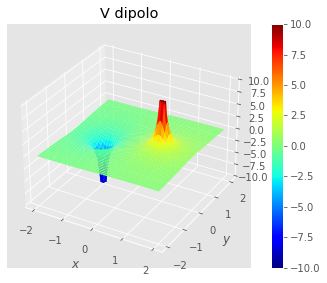

In [13]:
xms, yms, vdipolo = dipole_potential()

/Users/Xabier/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  after removing the cwd from sys.path.


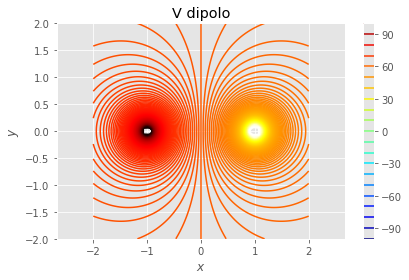

In [14]:
fig = plt.figure();
plt.contour(xms, yms, vdipolo, 300, cmap='hot');
plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('V dipolo')
fig.colorbar(sf); plt.axis('equal'); plt.tight_layout();

*Cuestión*: ¿Qué indica que los conjuntos de nivel están muy próximos entre ellos? ¿Y cuándo están alejados?

### Funciones vectoriales

Considera la siguiente función que, supogo, la has visto con anterioridad en Electromagnetismo. 

Es el campo eléctrico de una carga $q$ centrada en el origin $(0, 0, 0)$:

$$
{\bf E} (x, y, z) = k\frac{q}{(x^2 + y^2 + z^2)^{3/2}} \left( x, y, z \right) 
$$




Quizás lo reconozcas mejor si lo reescribimos en coordenades esféricas, donde $r$ es la distancia a la carga, y ${\hat r}$, el vector unitario que une la carga con el punto donde estimamos el campo.

$$
{\bf E} ({\bf r}) =  k\frac{q}{r^2} {\hat r}
$$


El campo eléctrico, ${\bf E} (x, y, z)$, es una **función vectorial**.
    
Una función vectorial asigna a cada punto, ${\bf x}$, de una región, o dominio, $\mathcal{D}$ de un espacio real de dimensión $n$, con $n \ge 1$, $\mathrm{R}^n$, un punto de un espacio real de dimensión $m$, con $m >1$, $\mathrm{R}^m$.

$$
{\bf x} \in \mathcal{D} \subset \mathrm{R}^n \mapsto \bf{f}(\bf x) \in \mathrm{R}^m
$$

Nota que $n \ge 1$ y $ m >1$.


#### Funciones componentes

Si te fijas el campo eléctrico, ${\bf E}({\bf x})$ lo hemos expresado como tres funciones escalares:

$$
E_x ( x, y, z) =  k \frac{q}{(x^2+y^2+z^2)} \; \frac{x}{\sqrt{x^2 + y^2 + z^2}} 
$$
$$
E_y ( x, y, z) =  k \frac{q}{(x^2+y^2+z^2)} \; \frac{y}{\sqrt{x^2 + y^2 + z^2}} 
$$
$$
E_z ( x, y, z) =  k \frac{q}{(x^2+y^2+z^2)} \; \frac{z}{\sqrt{x^2 + y^2 + z^2}} 
$$


Cada una de ellas es una función componente.

Llamamos función componente, $f_i({\bf x})$, a cada función escalar que representa la coordenada $i$-ésima de una función vectorial, 

$$
{\bf f} ({\bf x}) = \left( f_1 ({\bf x}), \dots, f_m({\bf x}) \, \right).
$$

O lo que es lo mismo, para dar una función vectorial, basta con dar sus funciones componentes.




*Nota*: Para indicar valores o funciones vectoriales usamos letras en negrita, mientras que usamos tipos normales para valores o funciones escalares.


#### ¿Cómo dibujar un campo vectorial?

En realidad no podemos dibujar adecuadamente un campo vectorial.

No obstante podemos 'visualizar' un campo vectorial colocando sobre el espacio inicial unos vectorcitos o flechas, que por su tamaño, grosor o color nos digan en qué dirección va el campo y cuál es su módulo. ¡Aunque sólo podemos hacerlo en $\mathrm{R}^2$ y *malamente* en $\mathrm{R}^3$!

La siguiente figura intenta visualizar el campo eléctrico de una carga en dos dimensiones.


In [15]:
def charge_electric_field():

    xs = np.linspace(-10., 10., 50)
    ys = np.linspace(-10., 10., 50)
    xms, yms = np.meshgrid(xs, ys)

    rms = np.sqrt(xms*xms + yms*yms)
    k, q = 1., 1.

    Ex =  k * q/(rms*rms) * (xms/rms)
    Ey =  k * q/(rms*rms) * (yms/rms)

    fig = plt.figure(); ax = plt.gca()
    color = 2 * np.log(np.hypot(Ex, Ey))
    st = ax.streamplot(xms, yms, Ex, Ey, color = color, linewidth=1, cmap=plt.cm.inferno,
                  density=2, arrowstyle='->', arrowsize=1.5)
    plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('$(E_x, E_y)$'); 
    fig.colorbar(st.lines); plt.axis('equal'); plt.tight_layout();
    return xms, yms, Ex, Ey

In [16]:
xms, ysm, Ex, Ey = charge_electric_field()

Error in callback <function flush_figures at 0x1065c5b90> (for post_execute):


KeyboardInterrupt: 

El campo eléctrico es radial y se debilita conforme nos alejamos de la carga.

*Ejercicio*:

Intenta dibujar el campo eléctrico en el plano producido por un dipolo, centrado en el origen, cuyas cargas están separadas una distancia $d =2$. Considera por simplicidad $k =1, \, q = \pm 1$.

In [17]:
def dipole_electric_field():
    dsize    = 3.
    xs       = np.linspace(-dsize, dsize, 50)
    ys       = np.linspace(-dsize, dsize, 50)
    xms, yms = np.meshgrid(xs, ys)
 
    def Efield(xs, ys, x0, y0, q0, k = 1.):
        xx, yy = (xs - x0), ys - y0
        rr = np.sqrt(xx*xx + yy* yy)
        Ex, Ey = k*q0*xx/rr**3, k*q0*yy/rr**3
        return Ex, Ey

    Ex_neg, Ey_neg = Efield(xms, yms, -1., 0., -1.) 
    Ex_pos, Ey_pos = Efield(xms, yms, +1., 0., +1.) 
    Ex    , Ey     = Ex_neg + Ex_pos, Ey_neg + Ey_pos

    color = 2 * np.log(np.hypot(Ex, Ey))
    fig   = plt.figure(); ax = plt.gca()
    color = 2 * np.log(np.hypot(Ex, Ey)) 
    st    = ax.streamplot(xms, yms, Ex, Ey, color = color, 
                          linewidth=1, cmap=plt.cm.inferno,
                          density=2, arrowstyle='->', arrowsize=1.5)
    plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('$(E_x, E_y)$'); 
    fig.colorbar(st.lines); plt.axis('equal'); plt.tight_layout();
    return xms, yms, Ex, Ey

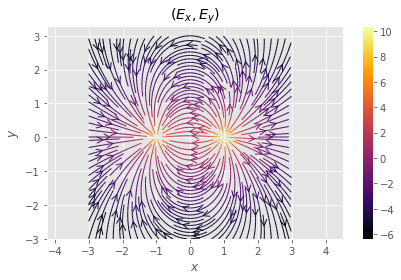

In [18]:
xms, ysm, Ex, Ey = dipole_electric_field()

La líneas de campo eléctrico de un dipolo salen de la carga positiva y mueren en la negativa.

####  ¡Aún hay más!

El concepto de conjunto de nivel es bastante común, seguramente conoces los mapas de nivel que representan una zona topográfica a partir de sus curvas de nivel. Cuando las líneas están muy juntas significa que la pendiente sube abruptamente, mientras que cuando están muy separadas indica que la pendiente es muy suave, un falso llano.

La imagen muestra el mapa topográfico de la zona de Canfranc, en el Pirineo, donde se encuentra, bajo la montaña de "El Tobazo" el Laboratorio Subterráneo de Canfranc donde se estudia, entre otras cosas, cuál es la naturaleza del neutrino o si existe la materia oscura. El enlace al laboratorio es [éste](https://lsc-canfranc.es). Fíjate lo empinado de sus laderas al lado de la estación internacional de Canfranc, luego míralas en la [foto]( http://notatherdesk.com/travel/exploring-canfranc-railway-station/)

| |
| :--: |
|<img src="imgs/Canfranc_mapa.png" width="250" />|
| Líneas de nivel en la zona de Canfranc Estación (Huesca) |

También puedes visitar la página del [tiempo](http://www.meteogalicia.gal/web/index.action) de Galicia y ver cómo dibujan las funciones escalares de la presión y las vectoriales de los vientos.



**¡Esto es todo por ahora!**